In [7]:
from har_datasets.dataset.har_dataset import HARDataset
from har_datasets.supported.getter import DatasetId, get_har_dataset_cfg_and_parser

In [8]:
cfg, parse = get_har_dataset_cfg_and_parser(DatasetId.OPPORTUNITY)
dataset = HARDataset(cfg, parse, override_cache=True)

Creating config hash...
Loading config hash...
Loading data...
Checking data format...
Resampling data...
Selecting activities...
Selecting channels...
Generating windows...


Saving windows: 100%|██████████| 7314/7314 [00:04<00:00, 1787.96it/s]


In [9]:
train_loader, val_loader, test_loader = dataset.get_dataloaders()

subject_id
3    2054
1    1941
2    1890
4    1429
Name: count, dtype: int64
3831 2054 1429
train: 3831 | val: 2054 | test: 1429


In [10]:
weights = dataset.get_class_weights(train_loader)
len(weights)

4

In [12]:
dataset.window_index
assert dataset.windows is not None
dataset.windows[0]

,IMU_BACK_acc_x,IMU_BACK_acc_y,IMU_BACK_acc_z,IMU_BACK_gyro_x,IMU_BACK_gyro_y,IMU_BACK_gyro_z,IMU_BACK_mag_x,IMU_BACK_mag_y,IMU_BACK_mag_z,IMU_BACK_quat_1,IMU_BACK_quat_2,IMU_BACK_quat_3,IMU_BACK_quat_4
1162,-918.50,-249.50,148.50,159.50,150.00,-25.00,504.00,-502.50,-340.00,479.00,-571.50,291.50,599.00
1163,-908.00,-258.00,123.00,259.00,295.00,-54.00,509.00,-509.00,-331.00,482.00,-574.00,297.00,592.00
1164,-926.25,-247.75,116.75,413.00,313.75,-84.00,514.50,-510.00,-321.00,485.50,-574.25,302.00,586.25
1165,-944.50,-237.50,110.50,567.00,332.50,-114.00,520.00,-511.00,-311.00,489.00,-574.50,307.00,580.50
1166,-984.00,-177.00,141.00,948.00,224.00,-107.00,528.00,-517.00,-287.00,501.00,-568.00,322.00,568.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,-911.00,-352.75,308.75,-728.25,-426.00,-22.00,539.75,-339.25,-476.75,392.25,-625.50,121.75,663.00
1234,-941.00,-425.50,321.50,-791.50,-261.00,83.00,534.50,-328.50,-485.50,388.50,-626.00,115.50,666.00
1235,-1110.00,-499.00,305.00,-669.00,-304.00,210.00,520.00,-324.00,-497.00,382.00,-625.00,107.00,672.00
1236,-1028.75,-491.25,263.50,-653.75,-308.00,245.75,515.50,-320.75,-505.00,377.75,-625.00,102.50,675.50


torch.Size([32, 76, 13])


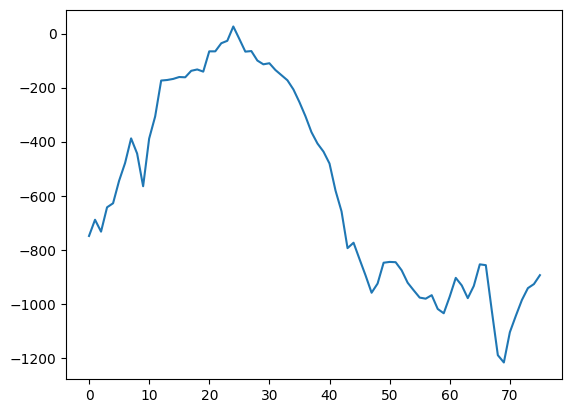

In [17]:
from matplotlib import pyplot as plt

y, x1, x2 = next(iter(train_loader))
print(x1.shape)

plt.plot(x1[0, :, 0])
plt.show()